##  TASK-1

In [ ]:
# Here we are downloading and installing PySpark of Version 3.2

!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 10.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805893 sha256=7e3ed130584e6ad57a6e7f442eee4e02806e903037ff1a0bd99ab41a6c62be37
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
# Building Spark Session and Configuration

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext

#create an instance of SQLContext
sqlContext = SQLContext(spark)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/24 15:42:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# Import essential libraries and functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt # Matplotlib library used for plotting

import pandas as pd # Pandas Library
import numpy as np # Numpy Library used for numerical calculations

In [ ]:
#Creating a Dataframe as CrimeData which includes data of Crimes for the cities: Cumbria Constabulary,Leicestershire Police,& Nottinghamshire Police

CrimeData = spark.read.option("header", "true").option("delimiter", ",").option("inferSchema", "true").csv("/kaggle/input/crimedata/*street.csv")
CrimeData.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|        LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|669fa661520a6ef86...|2022-05|Nottinghamshire P...|Nottinghamshire P...|-1.375369|53.099579|On or near Priory...|E01019400|Amber Valley 001A|Violence and sexu...| Status update una...|   null|
|                null|2022-05|Nottinghamshire P...|Nottinghamshire P...|-1.329291|53.021005|On or near Bridge...|E01019453|Amber Valley 017D|Anti-social behav...|                 null|   null|
|                null|2022-05|Notti

In [ ]:
# Displaying Schema of the Dataframe

CrimeData.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [ ]:
# Renaming the Column as per our requirement

CrimeData = CrimeData.withColumnRenamed('Crime ID', 'Crime_ID')
CrimeData = CrimeData.withColumnRenamed('Reported by','Reported_By')
CrimeData = CrimeData.withColumnRenamed('Falls within','Cities')
CrimeData = CrimeData.withColumnRenamed('LSOA code','LSOA_Code')
CrimeData = CrimeData.withColumnRenamed('LSOA name','LSOA_Name')
CrimeData = CrimeData.withColumnRenamed('Crime type','Crime_Type')
CrimeData = CrimeData.withColumnRenamed('Last outcome category','Last_Outcome_Category')

# After Renaming the coloummn we can check for  the result by executing printSchema() method along with the DataFrame.
CrimeData.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_By: string (nullable = true)
 |-- Cities: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_Code: string (nullable = true)
 |-- LSOA_Name: string (nullable = true)
 |-- Crime_Type: string (nullable = true)
 |-- Last_Outcome_Category: string (nullable = true)
 |-- Context: string (nullable = true)



In [ ]:
# After Renaming the coloummn we can check for  the result by executing printSchema() method along with the DataFrame.

CrimeData.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_By: string (nullable = true)
 |-- Cities: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_Code: string (nullable = true)
 |-- LSOA_Name: string (nullable = true)
 |-- Crime_Type: string (nullable = true)
 |-- Last_Outcome_Category: string (nullable = true)
 |-- Context: string (nullable = true)



In [ ]:
# To Print Number of Rows.

print(CrimeData.count())

577379


In [ ]:
# To Print Number of columns.

print(len(CrimeData.columns))

12


In [ ]:
# To Retrieves first five rows form the DataFarme and prints the result.

CrimeData.take(5)

[Row(Crime_ID='669fa661520a6ef86a226893c1eacd5a503b7801b8cf6c6f153200a5628bf02e', Month='2022-05', Reported_By='Nottinghamshire Police', Cities='Nottinghamshire Police', Longitude=-1.375369, Latitude=53.099579, Location='On or near Priory Road', LSOA_Code='E01019400', LSOA_Name='Amber Valley 001A', Crime_Type='Violence and sexual offences', Last_Outcome_Category='Status update unavailable', Context=None),
 Row(Crime_ID=None, Month='2022-05', Reported_By='Nottinghamshire Police', Cities='Nottinghamshire Police', Longitude=-1.329291, Latitude=53.021005, Location='On or near Bridge Street', LSOA_Code='E01019453', LSOA_Name='Amber Valley 017D', Crime_Type='Anti-social behaviour', Last_Outcome_Category=None, Context=None),
 Row(Crime_ID=None, Month='2022-05', Reported_By='Nottinghamshire Police', Cities='Nottinghamshire Police', Longitude=-1.253677, Latitude=53.141056, Location='On or near Petrol Station', LSOA_Code='E01027979', LSOA_Name='Ashfield 001A', Crime_Type='Anti-social behaviour',

In [ ]:
# To get the count of each month ordered by ascending Order.

CrimeData.groupby("Month").count().orderBy(asc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2021-02|19057|
|2021-01|19469|
|2020-12|19491|
|2022-01|20889|
|2022-09|21619|
|2020-11|21625|
|2021-12|22023|
|2022-02|22031|
|2021-10|22503|
|2022-10|22967|
|2022-06|23027|
|2021-04|23287|
|2021-03|23302|
|2021-08|23431|
|2022-07|23581|
|2021-11|23584|
|2021-09|23619|
|2021-05|23810|
|2022-11|24143|
|2021-07|24842|
+-------+-----+
only showing top 20 rows



In [ ]:
# To get the count of each month, ordered by descending order.

CrimeData.groupby("Month").count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-05|26662|
|2022-08|26239|
|2022-03|25655|
|2021-06|25454|
|2022-04|25069|
|2021-07|24842|
|2022-11|24143|
|2021-05|23810|
|2021-09|23619|
|2021-11|23584|
|2022-07|23581|
|2021-08|23431|
|2021-03|23302|
|2021-04|23287|
|2022-06|23027|
|2022-10|22967|
|2021-10|22503|
|2022-02|22031|
|2021-12|22023|
|2020-11|21625|
+-------+-----+
only showing top 20 rows



In [ ]:
# Yearly number of Crime in Descending Order.

CrimeData.select(substring(CrimeData.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+------+
|Year| count|
+----+------+
|2021|274381|
|2022|261882|
|2020| 41116|
+----+------+



In [ ]:
# Retreving Monthly number of Crime excluding for the month 2021-12 and sorting in Ascending order.

CrimeData.where((CrimeData.Month !='2021-12')).\
select(substring(CrimeData.Month, 6,7)\
.alias('Month'), CrimeData.Month.
\
alias('MonthWithYear')).groupby("Month").\
count().orderBy(asc("count")).show()

+-----+-----+
|Month|count|
+-----+-----+
|   12|19491|
|   01|40358|
|   02|41088|
|   09|45238|
|   10|45470|
|   04|48356|
|   07|48423|
|   06|48481|
|   03|48957|
|   08|49670|
|   05|50472|
|   11|69352|
+-----+-----+



In [ ]:
# To apply sql queries we need to create a temporary table.

CrimeData.registerTempTable("tbl_CrimeData")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [ ]:
# To get all the records form the table.
# By default the Spark sql fetches top 20 rows from the table.

sqlContext.sql("select * from tbl_CrimeData").show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_By|              Cities|Longitude| Latitude|            Location|LSOA_Code|        LSOA_Name|          Crime_Type|Last_Outcome_Category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|669fa661520a6ef86...|2022-05|Nottinghamshire P...|Nottinghamshire P...|-1.375369|53.099579|On or near Priory...|E01019400|Amber Valley 001A|Violence and sexu...| Status update una...|   null|
|                null|2022-05|Nottinghamshire P...|Nottinghamshire P...|-1.329291|53.021005|On or near Bridge...|E01019453|Amber Valley 017D|Anti-social behav...|                 null|   null|
|                null|2022-05|Notti

In [ ]:
# To get the total number of reocrd count.

sqlContext.sql("select count(*) from tbl_CrimeData").show()

+--------+
|count(1)|
+--------+
|  577379|
+--------+



In [ ]:
# Accessing specific elements from the table excluding Null values.

sqlContext.sql("select Crime_Id,Month,Reported_By,Cities from tbl_CrimeData where Crime_ID is not null").show()

+--------------------+-------+--------------------+--------------------+
|            Crime_Id|  Month|         Reported_By|              Cities|
+--------------------+-------+--------------------+--------------------+
|669fa661520a6ef86...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|fa7865ab32ebfb00f...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|9670784d2ee4a9b69...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|83c561d475d88de4f...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|71d2937a947cace02...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|987af9ac15e3e6624...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|c7aa46bd3db26a6ae...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|ea667a29bed52e82d...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|ae65209b8d9304297...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|23a9183f221203a05...|2022-05|Nottinghamshire P...|Nottinghamshire P...|
|64f4d11a95b0e02e0...|2022-05|Nottinghamshire P...|

In [ ]:
# To retrieve those records where City is from 'Leicestershire Police'.

sqlContext.sql("select * from tbl_CrimeData where Cities ='Leicestershire Police' and Crime_ID is not null ").show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_By|              Cities|Longitude| Latitude|            Location|LSOA_Code| LSOA_Name|          Crime_Type|Last_Outcome_Category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|f452c4f173253a904...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214768|52.622431|On or near Queens...|E01025631|Blaby 002A|            Burglary| Awaiting court ou...|   null|
|7e8c156f99e28cf26...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214176|52.621663|On or near Lowlan...|E01025631|Blaby 002A|        Public order| Investigation com...|   null|
|92068d66fa7c47414...|2022-05|Leicestershire Po...|Leicestershire Po..

In [ ]:
# To retrieve the count of records for Cumbria where the Crime_Type begins with the word "D" by using the Wildcards.

Wildcard_result = sqlContext.sql("SELECT count(*) as Total_Drugs FROM tbl_CrimeData WHERE Cities = 'Cumbria Constabulary' AND Crime_Type LIKE 'D%'")
Wildcard_result.show()

+-----------+
|Total_Drugs|
+-----------+
|       2154|
+-----------+



In [ ]:
# To retrieve the records based on word pattern as per the Crime_Type.

pattern_result = sqlContext.sql("SELECT Crime_Type FROM tbl_CrimeData WHERE Crime_Type LIKE '%Other%'")
pattern_result.show()

+-----------+
| Crime_Type|
+-----------+
|Other theft|
|Other crime|
|Other theft|
|Other crime|
|Other theft|
|Other theft|
|Other theft|
|Other theft|
|Other crime|
|Other crime|
|Other theft|
|Other theft|
|Other crime|
|Other theft|
|Other theft|
|Other theft|
|Other theft|
|Other crime|
|Other theft|
|Other crime|
+-----------+
only showing top 20 rows



In [ ]:
# To retrieve the records based on the Latitude value for the city Cumbria.

Latitude = sqlContext.sql("SELECT Cities as City, Crime_Type FROM \
tbl_CrimeData WHERE (Latitude LIKE '53.%' OR Latitude LIKE '52.%') AND Cities= 'Cumbria Constabulary'")
Latitude.show()

+--------------------+--------------------+
|                City|          Crime_Type|
+--------------------+--------------------+
|Cumbria Constabulary|             Robbery|
|Cumbria Constabulary|         Other theft|
|Cumbria Constabulary|Theft from the pe...|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|         Other theft|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|         Other crime|
|Cumbria Constabulary|         Other crime|
|Cumbria Constabulary|         Other crime|
|Cumbria Constabulary|         Other crime|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Anti-social behav...|
|Cumbria Constabulary|         Other crime|
|Cumbria Constabulary|       Vehicle crime|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Violence and sexu...|
|Cumbria Constabulary|Violence a

In [ ]:
# To retrieve the Last_Outcome_Category based on the Crime_type

Outcome = sqlContext.sql("select Crime_Type,Last_Outcome_Category from tbl_CrimeData where Cities in \
('Cumbria Constabulary', 'Leicestershire Police', 'Nottinghamshire Police')\
AND Last_Outcome_Category IS NOT NULL")
Outcome.show()

+--------------------+---------------------+
|          Crime_Type|Last_Outcome_Category|
+--------------------+---------------------+
|Violence and sexu...| Status update una...|
|            Burglary| Investigation com...|
|         Other theft| Investigation com...|
|        Public order| Unable to prosecu...|
|Violence and sexu...| Investigation com...|
|Violence and sexu...| Unable to prosecu...|
|Violence and sexu...| Investigation com...|
|Violence and sexu...| Court result unav...|
|         Other crime| Court result unav...|
|Criminal damage a...| Unable to prosecu...|
|               Drugs| Investigation com...|
|         Other theft| Unable to prosecu...|
|        Public order| Formal action is ...|
|        Public order| Unable to prosecu...|
|Violence and sexu...| Investigation com...|
|Violence and sexu...| Investigation com...|
|Violence and sexu...|     Local resolution|
|Violence and sexu...| Unable to prosecu...|
|Violence and sexu...| Unable to prosecu...|
|         

In [ ]:
# Maximum number of Crime reported for Nottinghamshire .

Max_Crime = sqlContext.sql("select max(Crime_Type) as Max_Crime_Noticed, count(*) as Total FROM tbl_CrimeData WHERE Cities = 'Nottinghamshire Police' \
group by Crime_Type Order by Total desc limit 1")
Max_Crime.show()

+--------------------+-----+
|   Max_Crime_Noticed|Total|
+--------------------+-----+
|Violence and sexu...|79326|
+--------------------+-----+



In [ ]:
# Minimum number of Crime reported for Nottinghamshire .

Min_Crime = sqlContext.sql("select min(Crime_Type) as Min_Crime_Noticed, count(*) as Total FROM tbl_CrimeData WHERE Cities = 'Nottinghamshire Police'\
group by Crime_Type Order by Total asc limit 1 ")
Min_Crime.show()

+-----------------+-----+
|Min_Crime_Noticed|Total|
+-----------------+-----+
|          Robbery| 1914|
+-----------------+-----+



In [ ]:
# To retrieve those records where Crime_Type was either Drugs or Robbery.

sqlContext.sql("select Crime_Type, Cities from tbl_CrimeData where Crime_Type = 'Drugs' or Crime_Type = 'Robbery' ").show()

+----------+--------------------+
|Crime_Type|              Cities|
+----------+--------------------+
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
|   Robbery|Nottinghamshire P...|
|     Drugs|Nottinghamshire P...|
+----------+--------------------+
only showing top 20 rows



In [ ]:
# Count of different types of Crime_types for 3 different Cities.

sqlContext.sql("select distinct Month,Cities,Crime_type,count(*) as Number_of_Crime from tbl_CrimeData group by Month,Cities,Crime_type").show()

+-------+--------------------+--------------------+---------------+
|  Month|              Cities|          Crime_type|Number_of_Crime|
+-------+--------------------+--------------------+---------------+
|2021-06|Nottinghamshire P...|Criminal damage a...|           1017|
|2022-03|Nottinghamshire P...|Violence and sexu...|           3428|
|2022-02|Nottinghamshire P...|       Bicycle theft|            105|
|2022-05|Leicestershire Po...|            Burglary|            451|
|2022-02|Nottinghamshire P...|Possession of wea...|             92|
|2021-06|Nottinghamshire P...|Anti-social behav...|           4131|
|2021-11|Nottinghamshire P...|         Shoplifting|            841|
|2021-08|Nottinghamshire P...|            Burglary|            401|
|2022-11|Nottinghamshire P...|            Burglary|            427|
|2022-05|Leicestershire Po...|       Vehicle crime|            575|
|2022-11|Nottinghamshire P...|Possession of wea...|            120|
|2021-10|Nottinghamshire P...|Violence and sexu.

In [ ]:
# Extract Year from Month column and get the count of Crime_Type for city 'Leicestershire' and year as'2020'

Crime_Type = sqlContext.sql("select Year(Month) as year, Crime_Type, count(*) as count \
                            from tbl_CrimeData \
                            where Year(Month) = 2020 and Cities = 'Leicestershire Police' \
                            group by Year(Month), Crime_Type \
                            order by Year(Month), count DESC")

Crime_Type.show()

+----+--------------------+-----+
|year|          Crime_Type|count|
+----+--------------------+-----+
|2020|Violence and sexu...| 5578|
|2020|Anti-social behav...| 1672|
|2020|Criminal damage a...| 1563|
|2020|        Public order| 1545|
|2020|       Vehicle crime| 1017|
|2020|         Other theft|  947|
|2020|            Burglary|  765|
|2020|               Drugs|  592|
|2020|         Shoplifting|  488|
|2020|         Other crime|  365|
|2020|       Bicycle theft|  193|
|2020|Possession of wea...|  100|
|2020|             Robbery|   98|
|2020|Theft from the pe...|   77|
+----+--------------------+-----+



In [ ]:
# To find the crimes based on the location between the year 2020 to 2022 for Cumbria.

location = sqlContext.sql("select  Location, Year(Month) as year, count(*) AS Total_Number \
                        from tbl_CrimeData \
                        where Year(Month) between 2020 and 2022 and Cities = 'Cumbria Constabulary'   \
                        group by Year, Location \
                        order by  Year, Total_Number desc")

location.show()

+--------------------+----+------------+
|            Location|year|Total_Number|
+--------------------+----+------------+
|On or near Parkin...|2020|         334|
|On or near Superm...|2020|         180|
|On or near Sports...|2020|         142|
|On or near Petrol...|2020|         109|
|On or near Park/O...|2020|          84|
|On or near Shoppi...|2020|          82|
|On or near Main S...|2020|          33|
|On or near Twicke...|2020|          30|
| On or near Hospital|2020|          29|
|On or near Fisher...|2020|          28|
|On or near London...|2020|          26|
|On or near Church...|2020|          23|
|On or near High S...|2020|          23|
|On or near Police...|2020|          22|
|On or near Pedest...|2020|          22|
|On or near Lime G...|2020|          21|
|     On or near A595|2020|          20|
|On or near Brookside|2020|          19|
|On or near Duke S...|2020|          19|
|On or near Crelli...|2020|          18|
+--------------------+----+------------+
only showing top

In [ ]:
# To get the maximum amount of crime type recorded

CrimeCount = sqlContext.sql("select max (Crime_Type)as Crime_Type,100*count(*)/(select count(*) from tbl_CrimeData where Crime_type is not Null \
                              \
                             ) as Total \
                          from tbl_CrimeData group by Crime_type")
CrimeCount.show()

+--------------------+------------------+
|          Crime_Type|             Total|
+--------------------+------------------+
|Anti-social behav...|16.736493706906554|
|       Bicycle theft|1.2026762317299382|
|            Burglary|3.9402195091958663|
|Criminal damage a...| 9.576898363120238|
|               Drugs|3.0731980207108327|
|         Other crime|2.1562959511863093|
|         Other theft| 6.785490985990138|
|Possession of wea...|0.8881514568420397|
|        Public order| 9.231544618006543|
|             Robbery|0.6496599287469755|
|         Shoplifting| 5.629750995446665|
|Theft from the pe...|0.6333794613243641|
|       Vehicle crime|  4.63248576758074|
|Violence and sexu...|34.863755003212795|
+--------------------+------------------+



# Visualization

In [ ]:
#To get the Percentage(%) of Crimes_Types on 3 different Cities.

CrimePer = sqlContext.sql("select Crime_Type,Cities,100*count(*)/(select count(*) from tbl_CrimeData where Crime_type is not Null \
                              \
                             ) as Crime_Percent \
                          from tbl_CrimeData group by Crime_type,Cities order by Crime_Percent")
CrimePercent.show()

+--------------------+------------------+
|     max(Crime_Type)|             Total|
+--------------------+------------------+
|Anti-social behav...|16.736493706906554|
|       Bicycle theft|1.2026762317299382|
|            Burglary|3.9402195091958663|
|Criminal damage a...| 9.576898363120238|
|               Drugs|3.0731980207108327|
|         Other crime|2.1562959511863093|
|         Other theft| 6.785490985990138|
|Possession of wea...|0.8881514568420397|
|        Public order| 9.231544618006543|
|             Robbery|0.6496599287469755|
|         Shoplifting| 5.629750995446665|
|Theft from the pe...|0.6333794613243641|
|       Vehicle crime|  4.63248576758074|
|Violence and sexu...|34.863755003212795|
+--------------------+------------------+



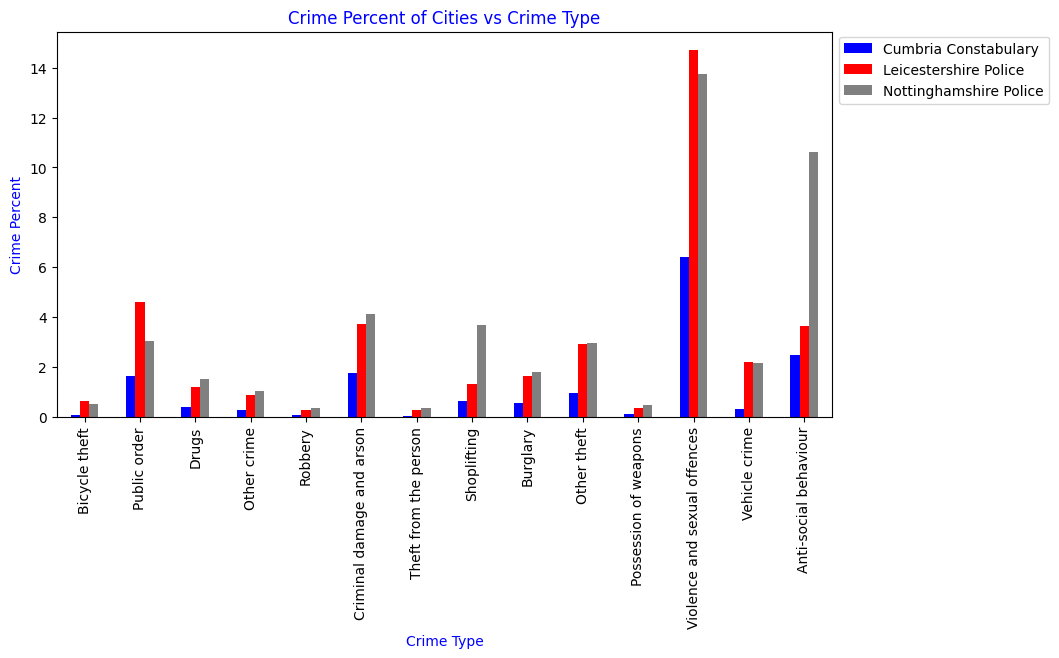

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming you have a PySpark DataFrame named 'CrimePercent'
# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Custom colors for the bars
bar_colors = ['blue', 'red', 'grey']

# Get unique cities from the PySpark DataFrame
#unique_cities = [row[0] for row in CrimePer.select("Cities").distinct().collect()]

# Pivot table in PySpark
#pivot_table = CrimePer.groupBy("Crime_Type").pivot("Cities").agg({"Crime_Percent": "max"})

# Convert PySpark DataFrame to Pandas for plotting
pivot_table_pandas = pivot_table.toPandas()

# Set "Crime_Type" as the index
pivot_table_pandas.set_index("Crime_Type", inplace=True)

# Assuming you have a list of legend labels corresponding to 'Cities' categories
legend_labels = unique_cities

# Plotting
plot_Outcome = pivot_table_pandas.plot(kind='bar', figsize=(10, 5), color=bar_colors)
plot_Outcome.set_title("Crime Percent of Cities vs Crime Type", color="blue")
plot_Outcome.set_xlabel("Crime Type", color="blue")
plot_Outcome.set_ylabel("Crime Percent", color="blue")  # Optional: Add y-axis label

# Set custom legend labels
plot_Outcome.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()


# Visualization

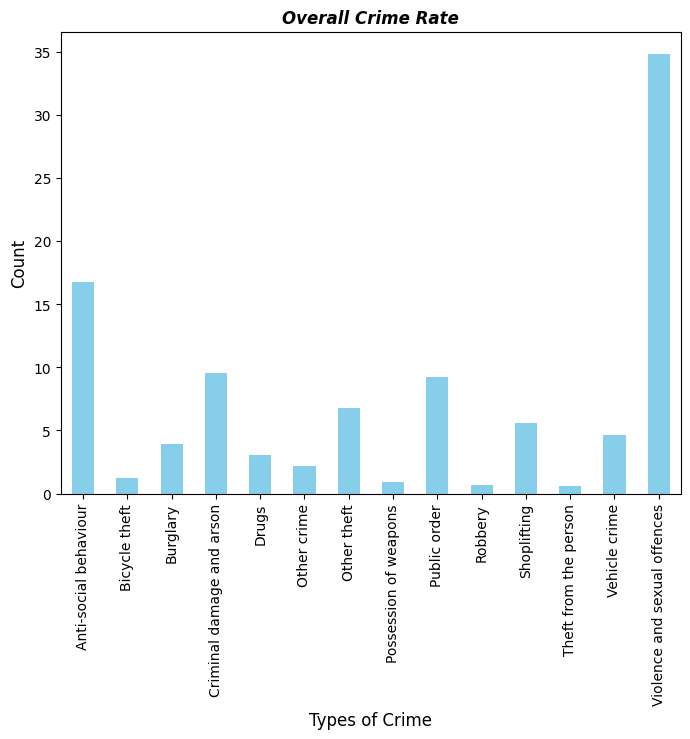

In [ ]:
# Visualization depicting Maximum Crime Rate
# Importing the librareies
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
crimecount = CrimeCount.toPandas()
crimecount.plot(figsize=(8,6),kind='bar',color='skyblue',x='Crime_Type',legend=None)

plt.xlabel("Types of Crime",fontsize=12)
plt.ylabel("Count",fontsize=12,)
plt.title('Overall Crime Rate',fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

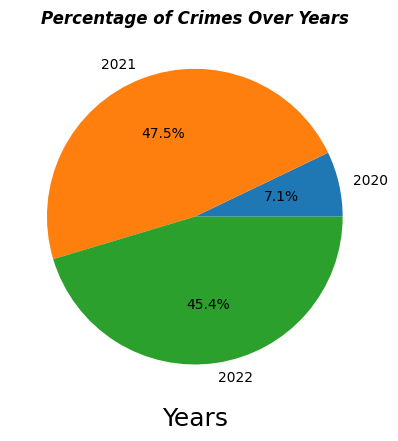

In [ ]:
# Pie Chart dipicting overall CrimePercent
NumberofCrimeOverYears = sqlContext.sql("SELECT YEAR(Month) AS year, COUNT(*) AS cnt FROM tbl_CrimeData GROUP BY YEAR(Month) ORDER BY YEAR(Month)")
NumberofCrimeOverYearsspd = NumberofCrimeOverYears.toPandas()

#Plotting the visual based on Pie Chart
plt.pie(x=NumberofCrimeOverYearsspd.cnt, labels=NumberofCrimeOverYearsspd.year, autopct='%1.1f%%')
plt.xlabel('Years', fontsize=18)
plt.title("Percentage of Crimes Over Years",fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
plt.show()

+--------------------+--------------------+-------------------+
|          Crime_Type|              Cities|       CrimePercent|
+--------------------+--------------------+-------------------+
|Violence and sexu...|Cumbria Constabulary| 41.149989996220796|
|Anti-social behav...|Cumbria Constabulary| 15.951581708645488|
|Criminal damage a...|Cumbria Constabulary|  11.32427806060067|
|        Public order|Cumbria Constabulary| 10.363915256874819|
|         Other theft|Cumbria Constabulary|  5.950025565213525|
|         Shoplifting|Cumbria Constabulary| 4.1337838739079205|
|            Burglary|Cumbria Constabulary|  3.486872818620368|
|               Drugs|Cumbria Constabulary|  2.394237823177645|
|       Vehicle crime|Cumbria Constabulary| 1.9007180490407487|
|         Other crime|Cumbria Constabulary|  1.667296534246271|
|Possession of wea...|Cumbria Constabulary| 0.6380188071049063|
|       Bicycle theft|Cumbria Constabulary|0.47128915368027924|
|             Robbery|Cumbria Constabula

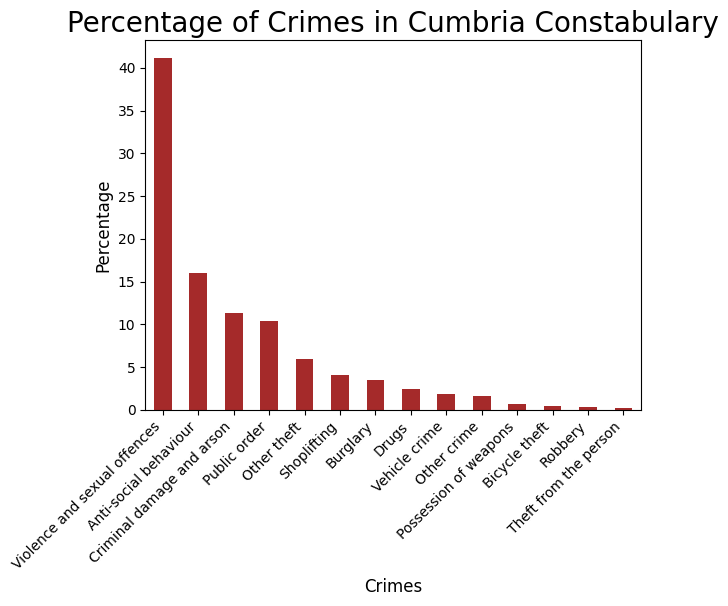

In [ ]:
# To get the Percentage(%)of different Crime_Type specificaly only for Cumbria.
Cumbria_Constabulary = sqlContext.sql("select distinct Crime_Type, Cities, 100 * COUNT(*) / (SELECT COUNT(*) FROM tbl_CrimeData WHERE Crime_Type IS \
not NULL and Cities = 'Cumbria Constabulary') AS CrimePercent \
                               from tbl_CrimeData \
                               where Cities = 'Cumbria Constabulary' \
                               group by Crime_Type, Cities order by CrimePercent desc")
# Plotting the visulization
Cumbria_Constabulary.show()
df= Cumbria_Constabulary.toPandas()
df.plot(kind='bar',color='brown', x='Crime_Type', y='CrimePercent', legend=False)
plt.xlabel("Crimes", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Percentage of Crimes in Cumbria Constabulary", fontsize=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

+--------------------+--------------------+------------------+
|          Crime_Type|              Cities|      CrimePercent|
+--------------------+--------------------+------------------+
|Violence and sexu...|Leicestershire Po...|38.511127330755315|
|        Public order|Leicestershire Po...|12.029485499789194|
|Criminal damage a...|Leicestershire Po...| 9.695670110570624|
|Anti-social behav...|Leicestershire Po...| 9.517959226232303|
|         Other theft|Leicestershire Po...|7.6071138755026455|
|       Vehicle crime|Leicestershire Po...| 5.742509622228368|
|            Burglary|Leicestershire Po...| 4.253274277709524|
|         Shoplifting|Leicestershire Po...| 3.386027028374807|
|               Drugs|Leicestershire Po...|  3.12898092781402|
|         Other crime|Leicestershire Po...|2.2549335170888054|
|       Bicycle theft|Leicestershire Po...|1.6474524328710736|
|Possession of wea...|Leicestershire Po...| 0.855006958831823|
|             Robbery|Leicestershire Po...| 0.694069805

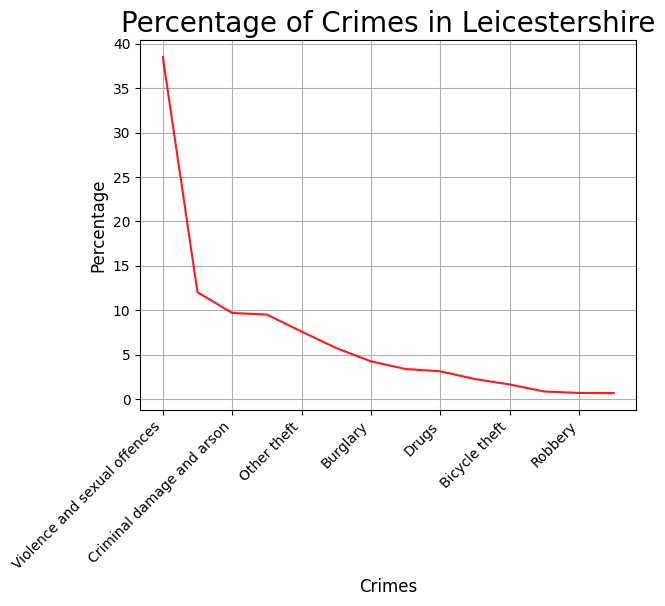

In [ ]:
# To get the Percentage(%)of different Crime_Type specificaly only for Leicestershire.

Leicestershire_Police = sqlContext.sql("select distinct Crime_Type, Cities, 100 * COUNT(*) / (SELECT COUNT(*) FROM tbl_CrimeData WHERE Crime_Type IS not NULL \
and Cities = 'Leicestershire Police') AS CrimePercent \
                               from tbl_CrimeData \
                               where Cities = 'Leicestershire Police' \
                               group by Crime_Type, Cities order by CrimePercent desc")

Leicestershire_Police.show()

# Plotting the visulization
df= Leicestershire_Police.toPandas()
df.plot(kind='line', color='red',x='Crime_Type', y='CrimePercent', legend=False,grid=True,alpha=0.9)
plt.xlabel("Crimes", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Percentage of Crimes in Leicestershire", fontsize=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

+--------------------+--------------------+------------------+
|          Crime_Type|              Cities|      CrimePercent|
+--------------------+--------------------+------------------+
|Violence and sexu...|Nottinghamshire P...|29.729040962410522|
|Anti-social behav...|Nottinghamshire P...|22.968556758985123|
|Criminal damage a...|Nottinghamshire P...| 8.889555147472173|
|         Shoplifting|Nottinghamshire P...| 7.988981748678934|
|        Public order|Nottinghamshire P...| 6.536746242926208|
|         Other theft|Nottinghamshire P...| 6.387962373046509|
|       Vehicle crime|Nottinghamshire P...| 4.635910504815801|
|            Burglary|Nottinghamshire P...|3.8342765056402954|
|               Drugs|Nottinghamshire P...|3.2560056965108872|
|         Other crime|Nottinghamshire P...|2.2396282277105275|
|       Bicycle theft|Nottinghamshire P...| 1.081587527639321|
|Possession of wea...|Nottinghamshire P...|0.9998875688640707|
|Theft from the pe...|Nottinghamshire P...|0.7345500880

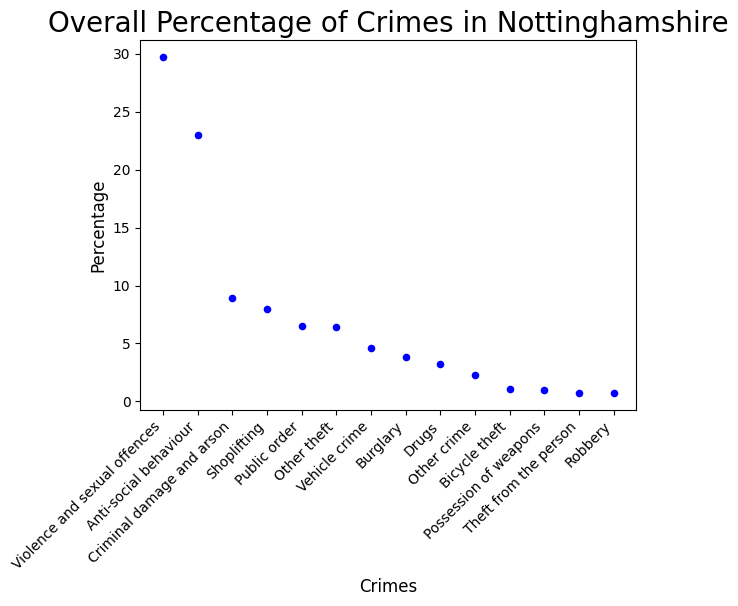

In [ ]:
# To get the Percentage(%)of different Crime_Type specificaly only for Nottinghamshire.

Nottinghamshire_Police = sqlContext.sql("select distinct Crime_Type, Cities, 100 * COUNT(*) / (SELECT COUNT(*) FROM tbl_CrimeData WHERE Crime_Type IS \
not NULL and Cities = 'Nottinghamshire Police') AS CrimePercent \
                               from tbl_CrimeData \
                               where Cities = 'Nottinghamshire Police' \
                               group by Crime_Type, Cities order by CrimePercent desc ")
Nottinghamshire_Police.show()

# Plotting the visulization
df= Nottinghamshire_Police.toPandas()
df.plot(kind='scatter', color='blue',x='Crime_Type', y='CrimePercent', legend=False)
plt.xlabel("Crimes", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Overall Percentage of Crimes in Nottinghamshire", fontsize=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

# SparkSql-Joins

In [ ]:
# Creating a DataFrame and Loading single file of Cumbria of 2022-11.
CrimeCumbria = spark.read.option("header", "true").option("delimiter", ",").option("inferSchema", "true").csv("/kaggle/input/crimedata/2022-11-cumbria-street.csv")
CrimeCumbria.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------+--------------------+---------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|     LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------+--------------------+---------------------+-------+
|6b3b360803a301fd8...|2022-11|Cumbria Constabulary|Cumbria Constabulary|-3.381937|54.870367|On or near Pennin...|E01019126|Allerdale 001A|Criminal damage a...| Unable to prosecu...|   null|
|f45727b4073b35bea...|2022-11|Cumbria Constabulary|Cumbria Constabulary|-3.382903|54.871255|On or near Fell C...|E01019126|Allerdale 001A|Criminal damage a...| Investigation com...|   null|
|63f4a818b6a44402a...|2022-11|Cumbria Constabulary

In [ ]:
# Creating a DataFrame and Loading a single file of Leicester of 2022-11

CrimeLeicester = spark.read.option("header", "true").option("delimiter", ",").option("inferSchema", "true").csv("/kaggle/input/crimedata/2022-11-leicestershire-street.csv")
CrimeLeicester.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code| LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|ee1a56b8eefc19b42...|2022-11|Leicestershire Po...|Leicestershire Po...|-1.211313|52.619873|On or near Pickar...|E01025631|Blaby 002A|            Burglary| Investigation com...|   null|
|0e87d2175e9048353...|2022-11|Leicestershire Po...|Leicestershire Po...|-1.211133| 52.61917|On or near Cox Me...|E01025631|Blaby 002A|Violence and sexu...| Unable to prosecu...|   null|
|cc790c20d55f647f6...|2022-11|Leicestershire Po...|Leicestershire Po..

In [ ]:
# Creating a DataFrame and Loading a single file of Nottingham of 2022-11

CrimeNottingham = spark.read.option("header", "true").option("delimiter", ",").option("inferSchema", "true").csv("/kaggle/input/crimedata/2022-11-nottinghamshire-street.csv")
CrimeNottingham.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|        LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|55d0ac7e04bc6c183...|2022-11|Nottinghamshire P...|Nottinghamshire P...|-1.345012|53.016499|On or near Mansfi...|E01019439|Amber Valley 013D|Violence and sexu...| Status update una...|   null|
|07c3a202e2c87dada...|2022-11|Nottinghamshire P...|Nottinghamshire P...|-1.429496|53.006669|On or near Mayfie...|E01019450|Amber Valley 015C|Violence and sexu...| Unable to prosecu...|   null|
|7b791353146cb6605...|2022-11|Notti

In [ ]:
# To Perform Sql queries we need to create a temporary table

CrimeCumbria.registerTempTable("tbl_CrimeCumbria")
CrimeLeicester.registerTempTable("tbl_CrimeLeicester")
CrimeNottingham.registerTempTable("tbl_CrimeNottingham")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [ ]:
# Performing Inner-Join between the Cities Cumbria & Liecester.

result = sqlContext.sql('select distinct cm.`Crime ID` as Crime_ID,cm.`Crime type`,cm.`Last outcome category` \
as Last_Outcome_Category,COUNT(cm.`Crime ID`) as Count \
    from tbl_CrimeCumbria cm,tbl_CrimeLeicester ls \
    where cm.`Crime type` = ls.`Crime type`\
    group by cm.`Crime ID`,cm.`Crime type`,cm.`Last outcome category`')

result.show()

+--------------------+--------------------+---------------------+-----+
|            Crime_ID|          Crime type|Last_Outcome_Category|Count|
+--------------------+--------------------+---------------------+-----+
|fe118cc630b89c85d...|            Burglary| Unable to prosecu...|  521|
|e0e8f899ddc72ccfa...|Violence and sexu...| Investigation com...| 3799|
|fe01b9b73d6ed9bcb...|Violence and sexu...| Unable to prosecu...| 3799|
|022e9a0093c333ce2...|Violence and sexu...| Unable to prosecu...| 3799|
|f196c413e9822f1dd...|Violence and sexu...| Court result unav...| 3799|
|100cb91037df3669e...|Violence and sexu...| Unable to prosecu...| 3799|
|8751dadcc5b3d5ecc...|Violence and sexu...| Unable to prosecu...| 3799|
|9ec5d9347002d16da...|Violence and sexu...| Unable to prosecu...| 3799|
|208fbd039e1f25cf6...|Violence and sexu...| Status update una...| 3799|
|ee8019f50b8a915d1...|Violence and sexu...| Status update una...| 3799|
|0f4a084848d8351fd...|Violence and sexu...| Unable to prosecu...

In [ ]:
# Performing Left-Outer join between two cities Cumbria & Leicester.

result = sqlContext.sql("select distinct cm.`Crime ID` as Crime_ID,cm.`Crime type`,cm.`Last outcome category` \
as Last_Outcome_Category,COUNT(cm.`Crime ID`) as Count \
from tbl_CrimeCumbria cm \
left outer join tbl_CrimeLeicester ls on cm.`Crime type` = ls.`Crime type` \
group by cm.`Crime ID`,cm.`Crime type`,cm.`Last outcome category`")

result.show()

+--------------------+--------------------+---------------------+-----+
|            Crime_ID|          Crime type|Last_Outcome_Category|Count|
+--------------------+--------------------+---------------------+-----+
|0f4a084848d8351fd...|Violence and sexu...| Unable to prosecu...| 3799|
|60f8e2de7caf65632...|Criminal damage a...| Investigation com...|  855|
|6360ff451eda8ca0f...|Criminal damage a...| Unable to prosecu...|  855|
|fe118cc630b89c85d...|            Burglary| Unable to prosecu...|  521|
|ee8019f50b8a915d1...|Violence and sexu...| Status update una...| 3799|
|208fbd039e1f25cf6...|Violence and sexu...| Status update una...| 3799|
|9ec5d9347002d16da...|Violence and sexu...| Unable to prosecu...| 3799|
|8751dadcc5b3d5ecc...|Violence and sexu...| Unable to prosecu...| 3799|
|8fc848663171e767c...|        Public order| Unable to prosecu...| 1291|
|dc123d1cdfe1aa115...|         Other theft| Unable to prosecu...|  814|
|100cb91037df3669e...|Violence and sexu...| Unable to prosecu...

In [ ]:
# Performing Inner-Join between the Cities Liecester & Nottingham.

result = sqlContext.sql('select distinct ls.`Crime ID` as Crime_ID,ls.`Crime type`,ls.`Last outcome category` as Last_Outcome_Category,COUNT(ls.`Crime ID`) as Count \
                         from tbl_CrimeLeicester ls,tbl_CrimeNottingham nt \
                         where ls.`Crime type` = nt.`Crime type`\
                         group by ls.`Crime ID`,ls.`Crime type`,ls.`Last outcome category`')

result.show()

+--------------------+--------------------+---------------------+-----+
|            Crime_ID|          Crime type|Last_Outcome_Category|Count|
+--------------------+--------------------+---------------------+-----+
|3b2630723a650331c...|Violence and sexu...| Unable to prosecu...| 3315|
|c315b978992d386ce...|Criminal damage a...| Investigation com...|  978|
|d7c19b8d6b17d62ac...|Violence and sexu...| Unable to prosecu...| 3315|
|4d96f49912b341142...|Theft from the pe...| Offender given a ...|   72|
|f0729de63c3e30c64...|        Public order| Investigation com...|  739|
|dbf247a0da298e99b...|       Vehicle crime| Investigation com...|  568|
|a4e91fab466b17a34...|            Burglary| Investigation com...|  427|
|2aa8e261a9f2ae79a...|        Public order| Court result unav...|  739|
|70e1835eb189bd0c8...|         Shoplifting| Investigation com...|  893|
|6c40b9e8cc48961ba...|Violence and sexu...| Unable to prosecu...| 3315|
|e0823b38afc12e17a...|       Vehicle crime| Unable to prosecu...

In [ ]:
# Performing right-outer between the Cities Liecester & Nottingham.

result = sqlContext.sql("select distinct ls.`Crime ID` as Crime_ID,ls.`Crime type`,ls.`Last outcome category` as Last_Outcome_Category,COUNT(ls.`Crime ID`) as Count \
                        from tbl_CrimeLeicester ls \
                        right outer join tbl_CrimeNottingham  nt on ls.`Crime type` = nt.`Crime type` \
                        group by ls.`Crime ID`,ls.`Crime type`,ls.`Last outcome category`")

result.show()

+--------------------+--------------------+---------------------+-----+
|            Crime_ID|          Crime type|Last_Outcome_Category|Count|
+--------------------+--------------------+---------------------+-----+
|28f8f1c387070b456...|Violence and sexu...| Investigation com...| 3315|
|57c5936292617c79b...|Violence and sexu...| Awaiting court ou...| 3315|
|5858f8d8274f3f530...|Violence and sexu...| Further action is...| 3315|
|c97e3c29e0289c924...|Violence and sexu...| Unable to prosecu...| 3315|
|f157ae384e7bef216...|Violence and sexu...| Unable to prosecu...| 3315|
|c0f5de06411ba39fa...|Violence and sexu...| Investigation com...| 3315|
|e3c68b5b792daab8b...|Violence and sexu...|     Local resolution| 3315|
|d9506a15f7050c8f2...|Violence and sexu...| Unable to prosecu...| 3315|
|b570ccaf689791229...|Violence and sexu...| Unable to prosecu...| 3315|
|93c6c2f9f712a1a5e...|Violence and sexu...| Unable to prosecu...| 3315|
|49e022ec5b8d5cfe6...|Violence and sexu...| Unable to prosecu...

# LAB NEED TO HAVE A LOOK

In [ ]:
# Creating a new data frame with Month and Counts per Month

CrimeData2 = CrimeData.select(CrimeData.Month)\
.groupby(CrimeData.Month).count()
CrimeData2.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2021-07|24842|
|2022-04|25069|
|2021-04|23287|
|2022-06|23027|
|2021-06|25454|
|2022-02|22031|
|2022-08|26239|
|2021-11|23584|
|2021-03|23302|
|2021-10|22503|
|2022-11|24143|
|2021-05|23810|
|2022-03|25655|
|2022-05|26662|
|2021-08|23431|
|2021-09|23619|
|2020-12|19491|
|2022-07|23581|
|2021-02|19057|
|2021-12|22023|
+-------+-----+
only showing top 20 rows



In [ ]:
#Printing the schema of the DataFrame CrimeData2

CrimeData2.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



In [ ]:
# Ordering the DataFrame by "Month" column in descending order

CrimeData2.orderBy(desc("Month")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-11|24143|
|2022-10|22967|
|2022-09|21619|
|2022-08|26239|
|2022-07|23581|
|2022-06|23027|
|2022-05|26662|
|2022-04|25069|
|2022-03|25655|
|2022-02|22031|
|2022-01|20889|
|2021-12|22023|
|2021-11|23584|
|2021-10|22503|
|2021-09|23619|
|2021-08|23431|
|2021-07|24842|
|2021-06|25454|
|2021-05|23810|
|2021-04|23287|
+-------+-----+
only showing top 20 rows



In [ ]:
# Registering the Dataframe as temporary table in spark

CrimeData2.registerTempTable("tbl_CrimeData2")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [ ]:
# Create new dataframe with month, total, and averages

monthlyCrimeAmount = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_CrimeData2 group by substring(Month, 6, 2)")
monthlyCrimeAmount.show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   07|48423|           24211.5|
|   11|69352|23117.333333333332|
|   01|40358|           20179.0|
|   09|45238|           22619.0|
|   05|50472|           25236.0|
|   08|49670|           24835.0|
|   03|48957|           24478.5|
|   02|41088|           20544.0|
|   06|48481|           24240.5|
|   10|45470|           22735.0|
|   12|41514|           20757.0|
|   04|48356|           24178.0|
+-----+-----+------------------+



In [ ]:
# Ordering the DataFrame by Month

monthlyCrimeAmountnew = monthlyCrimeAmount.orderBy('Month')

In [ ]:
# Displaying the records in the DataFrame

monthlyCrimeAmountnew.show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   01|40358|           20179.0|
|   02|41088|           20544.0|
|   03|48957|           24478.5|
|   04|48356|           24178.0|
|   05|50472|           25236.0|
|   06|48481|           24240.5|
|   07|48423|           24211.5|
|   08|49670|           24835.0|
|   09|45238|           22619.0|
|   10|45470|           22735.0|
|   11|69352|23117.333333333332|
|   12|41514|           20757.0|
+-----+-----+------------------+



In [ ]:
# Register the monthlyCrimeAmount DataFrame as a temp table and show the contents

monthlyCrimeAmountnew.registerTempTable("monthlyCrimeAmount")
sqlContext.sql("select * from monthlyCrimeAmount").show()

In [ ]:
# From the monthlyCrimeAmount table performing the queries and creting the variables

monthArray = sqlContext.sql("select Month from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

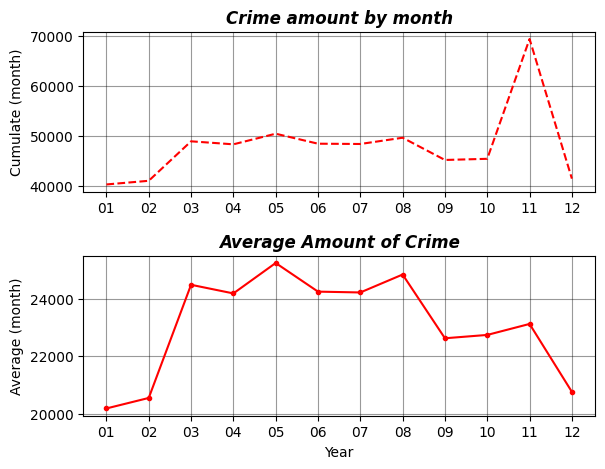

In [ ]:
# Plot visualisations

import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, '--',color='red')
plt.title('Crime amount by month',fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
plt.ylabel('Cumulate (month)')
plt.grid(True,color='black',alpha=0.4)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-',color='red')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True,color='black',alpha=0.4)
plt.title('Average Amount of Crime',fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
# To adjust the padding between the subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [ ]:
# Creating dataframe to retrieve information by year (total and average)

yearlyCrimeAmount = sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_CrimeData2 group by substring(Month, 0, 4)")

yearlyCrimeAmount.show()

+----+------+------------------+
|Year| Total|           Average|
+----+------+------------------+
|2020| 41116|           20558.0|
|2022|261882|23807.454545454544|
|2021|274381|22865.083333333332|
+----+------+------------------+



In [ ]:
yearlyCrimeAmount

DataFrame[Year: string, Total: bigint, Average: double]

In [ ]:
# Displaying the records in the DataFrame

yearlyCrimeAmount.show()

+----+------+------------------+
|Year| Total|           Average|
+----+------+------------------+
|2020| 41116|           20558.0|
|2022|261882|23807.454545454544|
|2021|274381|22865.083333333332|
+----+------+------------------+



In [ ]:
# Register the yearly data in a temp table and show the contents

yearlyCrimeAmount.registerTempTable("yearlyCrimeAmount")

In [ ]:
# Preparig variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

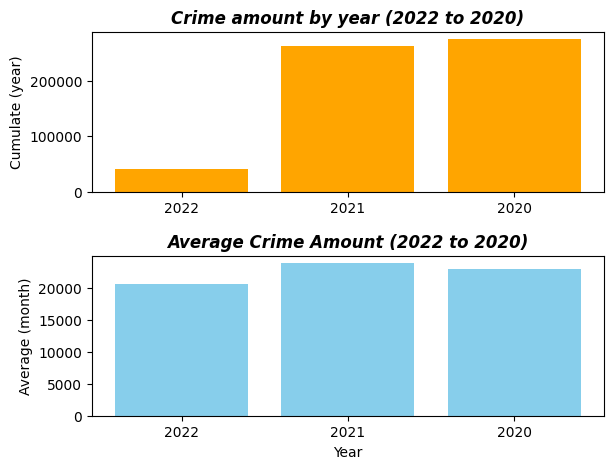

In [ ]:
# Plotting the  visualisation
import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.bar(y, t, color='orange')  # Use plt.bar for bar plot
plt.title('Crime amount by year (2022 to 2020)',fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
plt.ylabel('Cumulate (year)')


plt.subplot(2, 1, 2)
plt.bar(y, a, color='skyblue')  # Use plt.bar for bar plot
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.title('Average Crime Amount (2022 to 2020)',fontdict={'fontsize':12,'fontstyle':'oblique','fontweight':'bold','color':'Black'})
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plt.savefig("yearlyCrimeAmount.png")
plt.show()


In [ ]:
sqlContext.sql("select Month, substring(Month, 0, 4) \
as Year, count(*) as Count from tbl_CrimeData group by Month").show()

+-------+----+-----+
|  Month|Year|Count|
+-------+----+-----+
|2021-07|2021|24842|
|2022-04|2022|25069|
|2021-04|2021|23287|
|2022-06|2022|23027|
|2021-06|2021|25454|
|2022-02|2022|22031|
|2022-08|2022|26239|
|2021-11|2021|23584|
|2021-03|2021|23302|
|2021-10|2021|22503|
|2022-11|2022|24143|
|2021-05|2021|23810|
|2022-03|2022|25655|
|2022-05|2022|26662|
|2021-08|2021|23431|
|2021-09|2021|23619|
|2020-12|2020|19491|
|2022-07|2022|23581|
|2021-02|2021|19057|
|2021-12|2021|22023|
+-------+----+-----+
only showing top 20 rows



In [ ]:
CrimeData.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_By: string (nullable = true)
 |-- Cities: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_Code: string (nullable = true)
 |-- LSOA_Name: string (nullable = true)
 |-- Crime_Type: string (nullable = true)
 |-- Last_Outcome_Category: string (nullable = true)
 |-- Context: string (nullable = true)



In [ ]:
# Explore Crime Types per year/month

CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_CrimeData group by Month, Crime_type")
CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 3976|
|Anti-social behav...|2021-10|2021| 1925|
|         Shoplifting|2022-11|2022| 1459|
|         Other theft|2022-02|2022| 1550|
|Anti-social behav...|2021-04|2021| 5555|
|Possession of wea...|2021-08|2021|  199|
|Possession of wea...|2022-05|2022|  243|
|             Robbery|2021-05|2021|  144|
|Criminal damage a...|2021-03|2021| 2053|
|               Drugs|2021-07|2021|  629|
|       Bicycle theft|2021-11|2021|  316|
|Violence and sexu...|2021-04|2021| 7490|
|Violence and sexu...|2021-07|2021| 8682|
|             Robbery|2021-07|2021|  148|
|Possession of wea...|2021-06|2021|  179|
|Criminal damage a...|2022-08|2022| 2476|
|Possession of wea...|2021-07|2021|  188|
|        Public order|2021-05|2021| 2196|
|Theft from the pe...|2022-05|2022|  183|
|Violence and sexu...|2022-04|2022| 8387|
+--------------------+-------+----

In [ ]:
CrimeTypesGeo = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year, Latitude, Longitude, \
count(*) as Count from tbl_CrimeData group by Month, \
Crime_type, Latitude, Longitude")
CrimeTypesGeo.show()

+--------------------+-------+----+---------+---------+-----+
|          Crime_type|  Month|Year| Latitude|Longitude|Count|
+--------------------+-------+----+---------+---------+-----+
|Violence and sexu...|2022-05|2022|53.141122|  -1.2761|    1|
|Criminal damage a...|2022-05|2022|53.132636|-1.258456|    1|
|Anti-social behav...|2022-05|2022|53.126363|-1.308015|    1|
|Violence and sexu...|2022-05|2022| 53.13333|-1.312746|    1|
|Violence and sexu...|2022-05|2022|53.117411|-1.258913|    3|
|        Public order|2022-05|2022|53.099269|-1.247172|    1|
|Violence and sexu...|2022-05|2022|53.105661|-1.254335|    1|
|         Other theft|2022-05|2022|53.037324| -1.21383|    1|
|Criminal damage a...|2022-05|2022|53.027406|-1.222971|    1|
|Possession of wea...|2022-05|2022| 53.38811|-1.063685|    1|
|         Other crime|2022-05|2022|53.379513|-1.128485|    1|
|Criminal damage a...|2022-05|2022|53.320815| -0.94171|    1|
|Criminal damage a...|2022-05|2022|53.285367|-1.103672|    1|
|Violenc

## TASK-2

## Basic info Regarding the Dataset:

***Survival-0 = No, 1 = Yes***

***pclass:	Ticket class	1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)***

****sex:		Sex****

***Age:	Age in years***

**sibsp:	# of siblings / spouses aboard the Titanic**

***(Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)***

**parch:	# of parents / children aboard the Titanic**

***(Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them)***

**ticket:	Ticket number**

**fare:	Passenger fare**

**cabin:	Cabin number**

**embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton**

In [ ]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Dataset to new DataFrame 'data_titanic'
df = pd.read_csv('/kaggle/input/titanicdataset/TitanicData1.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Getting the info of the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# To check the missing values in the DataFrame

df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To check the total count of missing value in the DataFrame

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
# Filling the missing values for Age columns as Age canno't be considred as 0

mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [ ]:
# To check if there are any null values

df['Age'].isnull().sum()

0

In [ ]:
df['Cabin'] = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Cabin']

0        G6
1       C85
2        G6
3      C123
4        G6
       ... 
886       D
887     B42
888      G6
889    C148
890      G6
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Filling the missing values for the Cabin column as 'Unknown'

df['Cabin'].fillna('Unknown',inplace=True)
df['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Filling the missing values for the Embarked column  based on mode

mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode,inplace=True)

In [ ]:
# We can convert Sex to numeric value.

df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
# Removing the columns which are not required

df = df.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'],axis=1)

In [ ]:
# Cleaned Dataframe withou any missing values
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.000000,7.2500,S,0
1,1,female,38.000000,71.2833,C,1
2,3,female,26.000000,7.9250,S,1
3,1,female,35.000000,53.1000,S,1
4,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,S,0
887,1,female,19.000000,30.0000,S,1
888,3,female,29.699118,23.4500,S,0
889,1,male,26.000000,30.0000,C,1


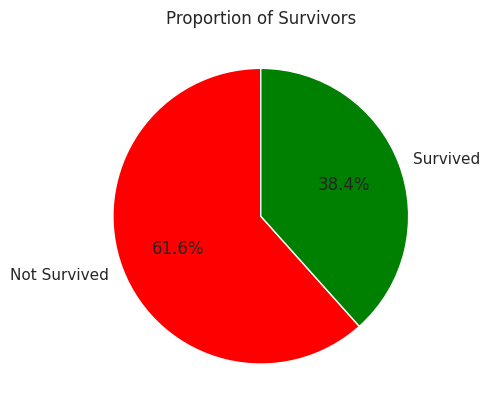

In [ ]:
# Visualization Dipicting the Overall Survival percentage

survived_counts = df['Survived'].value_counts()

# Plotting the pie chart
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Proportion of Survivors')
plt.show()

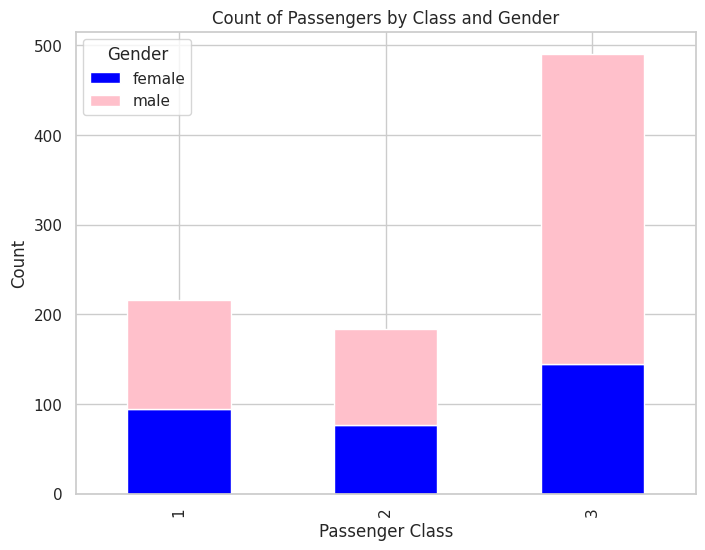

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Pclass' and 'Sex' are columns in your DataFrame df
class_gender_counts = df.groupby(['Pclass', 'Sex']).size().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

class_gender_counts.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'pink'])
ax.set_title('Count of Passengers by Class and Gender')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.legend(title='Gender')

plt.show()


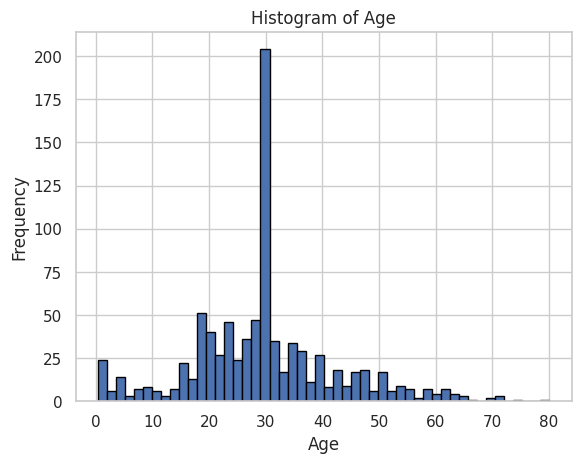

In [ ]:
plt.hist(df['Age'], bins=50, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

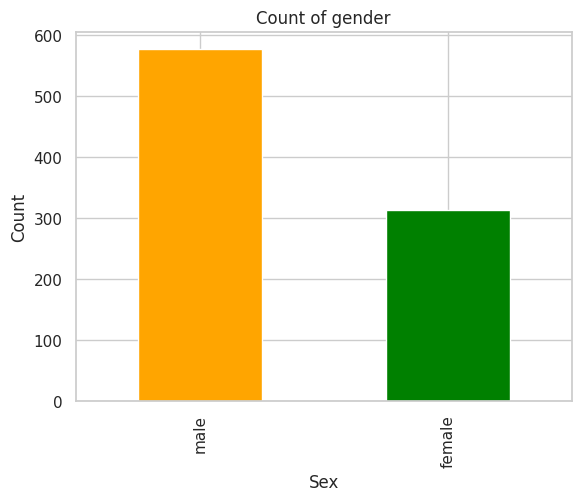

In [ ]:

df['Sex'].value_counts().plot(kind='bar',color=['orange','green'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of gender')
plt.show()


## Pyspark MLlib

In [ ]:
!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 4.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 12.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805893 sha256=b09744e396d47b431cd1c9953cdeeebe69bb5512b35cf91fb2d772f87548f80d
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
# Importing essential libraries and setting up the spark session
from pyspark.sql.functions import mean
from pyspark.sql.functions import col, round
from pyspark.sql.functions import col,round, sum as pyspark_sum
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("ml").getOrCreate()
sc = spark.sparkContext

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/25 19:42:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

In [ ]:
# Reading the data and displaying the result.

data_titanic = spark.read.csv("/kaggle/input/titanicdataset/TitanicData1.csv",inferSchema=True,header=True)
data_titanic.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|null|    0|    0|          33087

In [ ]:
# To count the number of null values in each columns
null_columns = [pyspark_sum(col(column).isNull().cast("int")).alias(column) for column in data_titanic.columns]
# To count the number of null values in each expression using the agg function
data_null = data_titanic.agg(*null_columns)
data_null.show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|          0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|       0|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [ ]:
# To fill the null values of Age column by "mean"
# Creating a variable
column_fill = 'Age'
# Calculate the mean of the column
mean_value = data_titanic.select(mean(column_fill)).collect()[0][0]
# Fill null values in the specified column with the mean value
data_titanic = data_titanic.na.fill(mean_value, [column_fill])

In [ ]:
# Filling missing values of 'Age' column by mean value
data_titanic = data_titanic.na.fill(mean_value, ['Age'])
# Rounding the values in  "Age" column to two decimal points
data_titanic = data_titanic.withColumn('Age', round(col('Age'), 2).cast('integer'))

In [ ]:
# Filling the missing values of "Cabin" coulmn as "Unknown"
data_titanic = data_titanic.na.fill("Unknown", ['Cabin'])

In [ ]:
from pyspark.sql.functions import when

# Define replacement mappings
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Apply replacement using when and otherwise
data_titanic = data_titanic.withColumn('Embarked',
                                       when(data_titanic['Embarked'] == 'S', embarked_mapping['S'])
                                       .when(data_titanic['Embarked'] == 'C', embarked_mapping['C'])
                                       .when(data_titanic['Embarked'] == 'Q', embarked_mapping['Q'])
                                       .otherwise(data_titanic['Embarked']))

In [ ]:
data_titanic.show()

+-----------+------+--------------------+------+---+-----+-----+----------------+-------+-------+--------+--------+
|PassengerId|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|Survived|
+-----------+------+--------------------+------+---+-----+-----+----------------+-------+-------+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25|Unknown|       0|       0|
|          2|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|    C85|       1|       1|
|          3|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925|Unknown|       0|       1|
|          4|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1|   C123|       0|       1|
|          5|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05|Unknown|       0|       0|
|          6|     3|    Moran, Mr. James|  male| 29|    0|    0|        

In [ ]:
# Droping the columns which are noot required for our analysis
column_drop = ['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin']
data_titanic = data_titanic.drop(*column_drop)

In [ ]:
data_titanic.show()

+------+------+---+--------+--------+
|Pclass|   Sex|Age|Embarked|Survived|
+------+------+---+--------+--------+
|     3|  male| 22|       0|       0|
|     1|female| 38|       1|       1|
|     3|female| 26|       0|       1|
|     1|female| 35|       0|       1|
|     3|  male| 35|       0|       0|
|     3|  male| 29|       2|       0|
|     1|  male| 54|       0|       0|
|     3|  male|  2|       0|       0|
|     3|female| 27|       0|       1|
|     2|female| 14|       1|       1|
|     3|female|  4|       0|       1|
|     1|female| 58|       0|       1|
|     3|  male| 20|       0|       0|
|     3|  male| 39|       0|       0|
|     3|female| 14|       0|       0|
|     2|female| 55|       0|       1|
|     3|  male|  2|       2|       0|
|     2|  male| 29|       0|       1|
|     3|female| 31|       0|       0|
|     3|female| 29|       1|       1|
+------+------+---+--------+--------+
only showing top 20 rows



In [ ]:
sex_num = StringIndexer(inputCol='Sex', outputCol='SexIndex')
data_titanic = sex_num.fit(data_titanic).transform(data_titanic)

In [ ]:
Embarked_num = StringIndexer(inputCol='Sex', outputCol='EmbarkedIndex')
data_titanic = Embarked_num.fit(data_titanic).transform(data_titanic)

In [ ]:
Assembler_features = VectorAssembler(inputCols=['Pclass','SexIndex','Age','EmbarkedIndex'],outputCol='features')

In [ ]:
label_value = StringIndexer(inputCol='Survived',outputCol='label')

In [ ]:
from pyspark.ml import Pipeline
data_prep_pipe = Pipeline(stages=[Assembler_features,label_value])

In [ ]:
cleaner = data_prep_pipe.fit(data_titanic)
clean_data = cleaner.transform(data_titanic)

In [ ]:
clean_data = clean_data.select(['label','features'])
clean_data.show()

+-----+------------------+
|label|          features|
+-----+------------------+
|  0.0|[3.0,0.0,22.0,0.0]|
|  1.0|[1.0,1.0,38.0,1.0]|
|  1.0|[3.0,1.0,26.0,1.0]|
|  1.0|[1.0,1.0,35.0,1.0]|
|  0.0|[3.0,0.0,35.0,0.0]|
|  0.0|[3.0,0.0,29.0,0.0]|
|  0.0|[1.0,0.0,54.0,0.0]|
|  0.0| [3.0,0.0,2.0,0.0]|
|  1.0|[3.0,1.0,27.0,1.0]|
|  1.0|[2.0,1.0,14.0,1.0]|
|  1.0| [3.0,1.0,4.0,1.0]|
|  1.0|[1.0,1.0,58.0,1.0]|
|  0.0|[3.0,0.0,20.0,0.0]|
|  0.0|[3.0,0.0,39.0,0.0]|
|  0.0|[3.0,1.0,14.0,1.0]|
|  1.0|[2.0,1.0,55.0,1.0]|
|  0.0| [3.0,0.0,2.0,0.0]|
|  1.0|[2.0,0.0,29.0,0.0]|
|  0.0|[3.0,1.0,31.0,1.0]|
|  1.0|[3.0,1.0,29.0,1.0]|
+-----+------------------+
only showing top 20 rows



In [ ]:
# Split the data into training and test sets (70/30%)
(training,testing) = clean_data.randomSplit([0.8,0.2])

## Naive Bayes

In [ ]:
# import machine learning method
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes()
# Train Naive bayes model using training data
predictor = NB.fit(training)

In [ ]:
# Test the model on testing data
NB_test = predictor.transform(testing)
NB_test.show()

+-----+------------------+--------------------+--------------------+----------+
|label|          features|       rawPrediction|         probability|prediction|
+-----+------------------+--------------------+--------------------+----------+
|  0.0|[1.0,0.0,29.0,0.0]|[-5.6469391977014...|[0.78418142214405...|       0.0|
|  0.0|[1.0,0.0,37.0,0.0]|[-6.3623054806848...|[0.80997576244188...|       0.0|
|  0.0|[1.0,0.0,45.0,0.0]|[-7.0776717636682...|[0.83334239063466...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[-7.2565133344140...|[0.83881206963359...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[-7.2565133344140...|[0.83881206963359...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[-7.2565133344140...|[0.83881206963359...|       0.0|
|  0.0|[1.0,0.0,50.0,0.0]|[-7.5247756905328...|[0.84674347658725...|       0.0|
|  0.0|[1.0,0.0,56.0,0.0]|[-8.0613004027703...|[0.86164523409296...|       0.0|
|  0.0|[1.0,0.0,58.0,0.0]|[-8.2401419735162...|[0.86633500911863...|       0.0|
|  0.0|[1.0,0.0,60.0,0.0]|[-8.4189835442

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(NB_test)
print("Accuracy of model at prediction: {}".format(acc))

Accuracy of model at prediction: 0.7720974788296975


In [ ]:
NB_PredicationAndLabel = NB_test['prediction','label']
NB_PredicationAndLabel.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 20 rows



In [ ]:
# import multiclassmetrics for precision, recall, and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
multi_metrics = MulticlassMetrics(NB_PredicationAndLabel.rdd)
precision_score = multi_metrics.weightedPrecision
recall_score = multi_metrics.weightedRecall
accuracy_score = multi_metrics.accuracy
print(f"Naive Bayes Recall score:{recall_score}")
print(f"Naive Bayes Precision score:{precision_score}")
print(f"Naive Bayes Accuracy score: {accuracy_score}")
#multi_metrics.confusionMatrix().toArray()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Naive Bayes Recall score:0.8054474708171206
Naive Bayes Precision score:0.8046436279560962
Naive Bayes Accuracy score: 0.8054474708171206


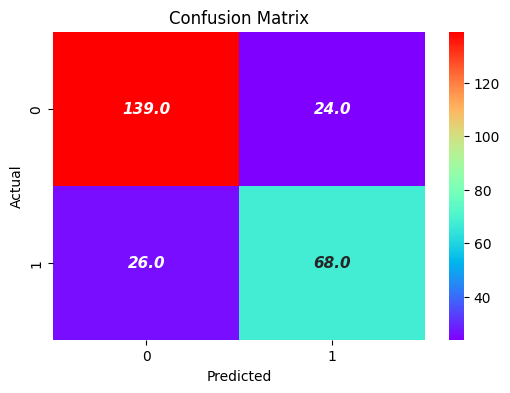

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the confusion matrix as a numpy array
confusion_matrix = multi_metrics.confusionMatrix().toArray()

# Creating a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt=".1f",cmap='rainbow', cbar=True,annot_kws={'fontname':'Time New Roman','fontstyle':'oblique','fontweight':'bold','fontsize':11})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression

In [ ]:
# import machine learning method
from pyspark.ml.classification import  LogisticRegression
LR =  LogisticRegression()
# Train Logestic Regression model using training data
predictor = LR.fit(training)

In [ ]:
# Test the model on testing data
LR_test = predictor.transform(testing)
LR_test.show()

+-----+------------------+--------------------+--------------------+----------+
|label|          features|       rawPrediction|         probability|prediction|
+-----+------------------+--------------------+--------------------+----------+
|  0.0|[1.0,0.0,29.0,0.0]|[0.14731973905724...|[0.53676346868259...|       0.0|
|  0.0|[1.0,0.0,37.0,0.0]|[0.36221987393490...|[0.58957769652516...|       0.0|
|  0.0|[1.0,0.0,45.0,0.0]|[0.57712000881256...|[0.64040445151806...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[0.63084504253198...|[0.65268104832204...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[0.63084504253198...|[0.65268104832204...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[0.63084504253198...|[0.65268104832204...|       0.0|
|  0.0|[1.0,0.0,50.0,0.0]|[0.71143259311110...|[0.67071763320740...|       0.0|
|  0.0|[1.0,0.0,56.0,0.0]|[0.87260769426934...|[0.70528801507519...|       0.0|
|  0.0|[1.0,0.0,58.0,0.0]|[0.92633272798876...|[0.71633068358297...|       0.0|
|  0.0|[1.0,0.0,60.0,0.0]|[0.98005776170

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(LR_test)
print("Accuracy of model  prediction: {}".format(acc))

Accuracy of model  prediction: 0.7896572209151291


In [ ]:
LR_PredicationAndLabel = LR_test['prediction','label']
LR_PredicationAndLabel.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 20 rows



In [ ]:
# import multiclassmetrics for precision, recall, and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
multi_metrics = MulticlassMetrics(LR_PredicationAndLabel.rdd)
precision_score = multi_metrics.weightedPrecision
recall_score = multi_metrics.weightedRecall
accuracy_score = multi_metrics.accuracy
print(f"Logistic Regression Recall score:{recall_score}")
print(f"Logistic Regression Precision score:{precision_score}")
print(f"Logistic Regression Accuracy score: {accuracy_score}")
#multi_metrics.confusionMatrix().toArray()

Logistic Regression Recall score:0.7928994082840237
Logistic Regression Precision score:0.7912143524491704
Logistic Regression Accuracy score: 0.7928994082840237


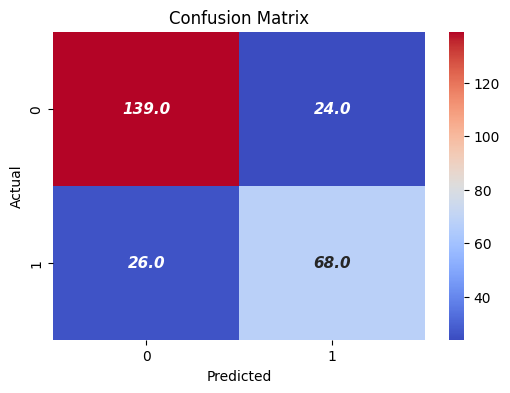

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the confusion matrix as a numpy array
confusion_matrix = multi_metrics.confusionMatrix().toArray()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt=".1f",cmap='coolwarm', cbar=True,annot_kws={'fontname':'Time New Roman','fontstyle':'oblique','fontweight':'bold','fontsize':11})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest

In [ ]:
# import machine learning method
from pyspark.ml.classification import  RandomForestClassifier
RM =  RandomForestClassifier()
# Train Random Forest model using training data
predictor = RM.fit(training)

In [ ]:
# Test the model on testing data
RM_test = predictor.transform(testing)
RM_test.show()

+-----+------------------+--------------------+--------------------+----------+
|label|          features|       rawPrediction|         probability|prediction|
+-----+------------------+--------------------+--------------------+----------+
|  0.0|[1.0,0.0,29.0,0.0]|[14.7168847323669...|[0.73584423661834...|       0.0|
|  0.0|[1.0,0.0,37.0,0.0]|[14.7001464697617...|[0.73500732348808...|       0.0|
|  0.0|[1.0,0.0,45.0,0.0]|[14.7001464697617...|[0.73500732348808...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[14.7001464697617...|[0.73500732348808...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[14.7001464697617...|[0.73500732348808...|       0.0|
|  0.0|[1.0,0.0,47.0,0.0]|[14.7001464697617...|[0.73500732348808...|       0.0|
|  0.0|[1.0,0.0,50.0,0.0]|[13.8854367391937...|[0.69427183695968...|       0.0|
|  0.0|[1.0,0.0,56.0,0.0]|[14.0760525749709...|[0.70380262874854...|       0.0|
|  0.0|[1.0,0.0,58.0,0.0]|[14.0760525749709...|[0.70380262874854...|       0.0|
|  0.0|[1.0,0.0,60.0,0.0]|[14.8116294980

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(RM_test)
print("Accuracy of model prediction: {}".format(acc))

Accuracy of model prediction: 0.8080820874355347


In [ ]:
RM_PredicationAndLabel = LR_test['prediction','label']
RM_PredicationAndLabel.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 20 rows



In [ ]:
# import multiclassmetrics for precision, recall, and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
multi_metrics = MulticlassMetrics(RM_PredicationAndLabel.rdd)
precision_score = multi_metrics.weightedPrecision
recall_score = multi_metrics.weightedRecall
accuracy_score = multi_metrics.accuracy
print(f"Random Forest Recall score:{recall_score}")
print(f"Random Forest Precision score:{precision_score}")
print(f"Random Forest Accuracy score: {accuracy_score}")
#multi_metrics.confusionMatrix().toArray()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Random Forest Recall score:0.7928994082840237
Random Forest Precision score:0.7912143524491704
Random Forest Accuracy score: 0.7928994082840237


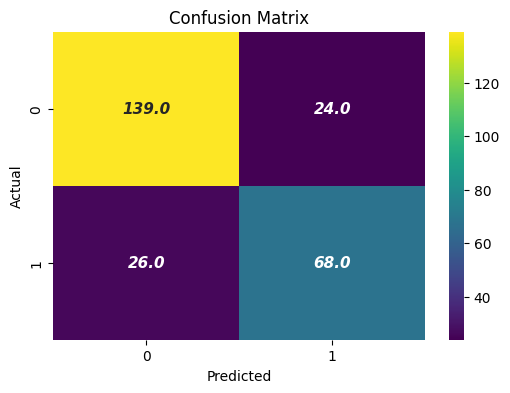

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the confusion matrix as a numpy array
confusion_matrix = multi_metrics.confusionMatrix().toArray()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt=".1f",cmap='viridis', cbar=True,annot_kws={'fontname':'Time New Roman','fontstyle':'oblique','fontweight':'bold','fontsize':11})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()